In [1]:
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/labels.csv")
df = df[:10000]
df["label"] = df["label"].apply(lambda x: eval(x))

In [3]:
index = 0
for i in df["label"]:
    df["label"][index] = i[:8] + i[9:10]
    index += 1
Y = [i for i in df["label"]]
Y = np.array(Y)
np.save("../Y.npy", Y)

In [2]:
def open_img(path):
    raw = Image.open(path)
    return np.array(raw)

In [3]:
def showimage(img):
    plt.imshow(img)
    plt.show()

In [18]:
Y = [i for i in df["label"]]
Y = np.array(Y)
index = 0
for i in Y:
    print(i)
    if index == 100:
        break
    index += 1

# X = np.zeros((0, 100, 100, 3), dtype=np.uint8)
# for i in range(10000):
#     X = np.concatenate((X, [open_img("../data/images/%d.jpeg" % i)]))

# np.save("../X1.npy", X)
np.save("../Y1.npy", Y)

[1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 1]
[1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 1]
[1 0 0 1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 1 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1]
[1 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 1]
[1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1]
[1 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1]
[1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 1 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 1 0 0 1 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0]
[0 0 1 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 1 0

In [4]:
X = np.load("../X.npy")
Y = np.load("../Y.npy")

In [5]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers # type: ignore

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=69)

In [7]:
def compile(model, epoch, learning_rate, batch_size):
  # Compilation using adam optimization algorithm
  model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss="binary_crossentropy",
    metrics=["accuracy"]
  ) 
  history = model.fit(
    xtrain,
    ytrain,
    epochs=epoch,
    validation_data=(xtest, ytest),
    batch_size=batch_size
  )
  return model, history

def setfigure():
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1])
  plt.legend(loc='lower right')
  plt.show()

def evaluate(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  setfigure()

In [1]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    # layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(512, (3, 3), activation='relu'),
    # layers.Conv2D(256, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    layers.GlobalAveragePooling2D(),
    # tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu',),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(9, activation='sigmoid')
])
model.summary()

NameError: name 'tf' is not defined

Epoch 1/10
250/250 [==============================] - 16s 55ms/step - loss: 0.3388 - accuracy: 0.2434 - val_loss: 0.3208 - val_accuracy: 0.2315
Epoch 2/10
250/250 [==============================] - 13s 52ms/step - loss: 0.3117 - accuracy: 0.2646 - val_loss: 0.2999 - val_accuracy: 0.2690
Epoch 3/10
250/250 [==============================] - 13s 52ms/step - loss: 0.2875 - accuracy: 0.3265 - val_loss: 0.2875 - val_accuracy: 0.3485
Epoch 4/10
250/250 [==============================] - 13s 52ms/step - loss: 0.2733 - accuracy: 0.3565 - val_loss: 0.2636 - val_accuracy: 0.3855
Epoch 5/10
250/250 [==============================] - 13s 52ms/step - loss: 0.2605 - accuracy: 0.3980 - val_loss: 0.2580 - val_accuracy: 0.4095
Epoch 6/10
250/250 [==============================] - 13s 53ms/step - loss: 0.2507 - accuracy: 0.4181 - val_loss: 0.2590 - val_accuracy: 0.3855
Epoch 7/10
250/250 [==============================] - 13s 52ms/step - loss: 0.2383 - accuracy: 0.4478 - val_loss: 0.2495 - val_accuracy:

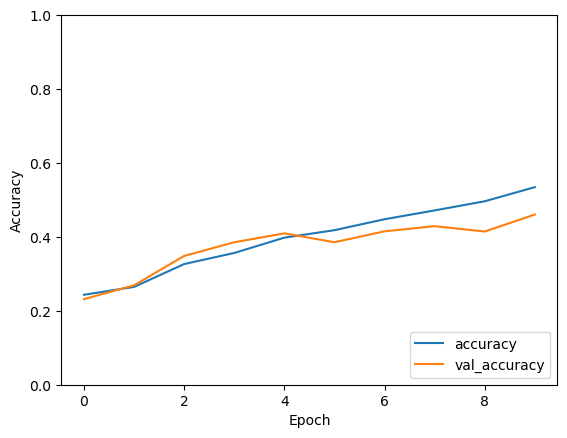

In [31]:
model, historytest = compile(model, 10)
evaluate(historytest)

Epoch 1/10
250/250 [==============================] - 14s 53ms/step - loss: 0.3304 - accuracy: 0.2636 - val_loss: 0.3035 - val_accuracy: 0.2865
Epoch 2/10
250/250 [==============================] - 13s 53ms/step - loss: 0.2945 - accuracy: 0.3136 - val_loss: 0.2877 - val_accuracy: 0.3240
Epoch 3/10
250/250 [==============================] - 13s 53ms/step - loss: 0.2762 - accuracy: 0.3688 - val_loss: 0.2663 - val_accuracy: 0.4035
Epoch 4/10
250/250 [==============================] - 13s 53ms/step - loss: 0.2621 - accuracy: 0.4053 - val_loss: 0.2610 - val_accuracy: 0.3980
Epoch 5/10
250/250 [==============================] - 13s 53ms/step - loss: 0.2495 - accuracy: 0.4399 - val_loss: 0.2544 - val_accuracy: 0.4250
Epoch 6/10
250/250 [==============================] - 13s 53ms/step - loss: 0.2417 - accuracy: 0.4491 - val_loss: 0.2455 - val_accuracy: 0.4325
Epoch 7/10
250/250 [==============================] - 13s 53ms/step - loss: 0.2322 - accuracy: 0.4756 - val_loss: 0.2439 - val_accuracy:

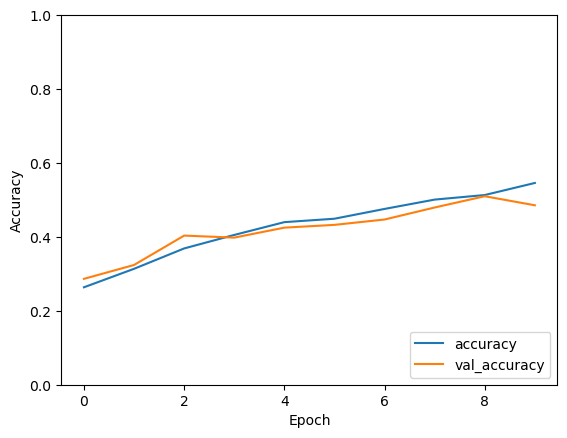

In [33]:
# GlobalAveragePooling
model, historytest = compile(model, 10)
evaluate(historytest)

Epoch 1/10
250/250 [==============================] - 14s 53ms/step - loss: 0.3347 - accuracy: 0.2424 - val_loss: 0.3242 - val_accuracy: 0.2315
Epoch 2/10
250/250 [==============================] - 13s 53ms/step - loss: 0.3108 - accuracy: 0.2749 - val_loss: 0.3066 - val_accuracy: 0.2685
Epoch 3/10
250/250 [==============================] - 13s 52ms/step - loss: 0.2942 - accuracy: 0.3334 - val_loss: 0.2884 - val_accuracy: 0.3290
Epoch 4/10
250/250 [==============================] - 13s 53ms/step - loss: 0.2843 - accuracy: 0.3550 - val_loss: 0.2932 - val_accuracy: 0.2945
Epoch 5/10
250/250 [==============================] - 13s 53ms/step - loss: 0.2718 - accuracy: 0.3759 - val_loss: 0.2724 - val_accuracy: 0.3730
Epoch 6/10
250/250 [==============================] - 13s 53ms/step - loss: 0.2603 - accuracy: 0.4078 - val_loss: 0.2538 - val_accuracy: 0.4120
Epoch 7/10
250/250 [==============================] - 13s 53ms/step - loss: 0.2495 - accuracy: 0.4319 - val_loss: 0.2510 - val_accuracy:

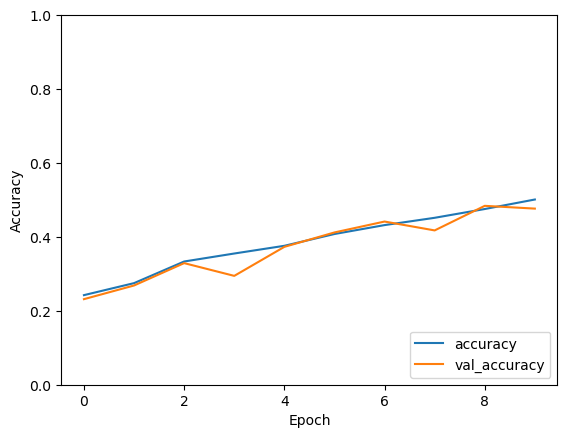

In [36]:
# added additional dense layer
model, historytest = compile(model, 10)
evaluate(historytest)

Epoch 1/10
250/250 [==============================] - 17s 61ms/step - loss: 0.3341 - accuracy: 0.2540 - val_loss: 0.3165 - val_accuracy: 0.2575
Epoch 2/10
250/250 [==============================] - 15s 59ms/step - loss: 0.3085 - accuracy: 0.2848 - val_loss: 0.3014 - val_accuracy: 0.2950
Epoch 3/10
250/250 [==============================] - 15s 59ms/step - loss: 0.2917 - accuracy: 0.3166 - val_loss: 0.2855 - val_accuracy: 0.3500
Epoch 4/10
250/250 [==============================] - 15s 59ms/step - loss: 0.2735 - accuracy: 0.3600 - val_loss: 0.2650 - val_accuracy: 0.3955
Epoch 5/10
250/250 [==============================] - 15s 59ms/step - loss: 0.2606 - accuracy: 0.3954 - val_loss: 0.2577 - val_accuracy: 0.3775
Epoch 6/10
250/250 [==============================] - 15s 59ms/step - loss: 0.2515 - accuracy: 0.4219 - val_loss: 0.2569 - val_accuracy: 0.4315
Epoch 7/10
250/250 [==============================] - 15s 59ms/step - loss: 0.2431 - accuracy: 0.4512 - val_loss: 0.2489 - val_accuracy:

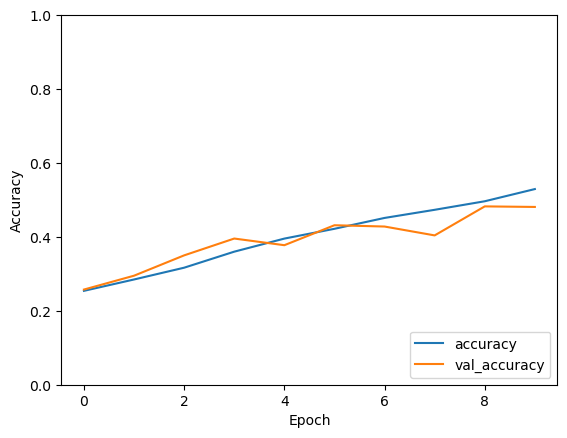

In [40]:
# Increased trainable params
model, historytest = compile(model, 10)
evaluate(historytest)

Epoch 1/10
250/250 [==============================] - 36s 118ms/step - loss: 0.3461 - accuracy: 0.2607 - val_loss: 0.3157 - val_accuracy: 0.2550
Epoch 2/10
250/250 [==============================] - 29s 114ms/step - loss: 0.2965 - accuracy: 0.3166 - val_loss: 0.2963 - val_accuracy: 0.3200
Epoch 3/10
250/250 [==============================] - 29s 115ms/step - loss: 0.2791 - accuracy: 0.3600 - val_loss: 0.2709 - val_accuracy: 0.3910
Epoch 4/10
250/250 [==============================] - 29s 115ms/step - loss: 0.2554 - accuracy: 0.4134 - val_loss: 0.2604 - val_accuracy: 0.4045
Epoch 5/10
250/250 [==============================] - 29s 115ms/step - loss: 0.2410 - accuracy: 0.4529 - val_loss: 0.2380 - val_accuracy: 0.4745
Epoch 6/10
250/250 [==============================] - 29s 115ms/step - loss: 0.2306 - accuracy: 0.4836 - val_loss: 0.2247 - val_accuracy: 0.4635
Epoch 7/10
250/250 [==============================] - 29s 116ms/step - loss: 0.2181 - accuracy: 0.5171 - val_loss: 0.2364 - val_ac

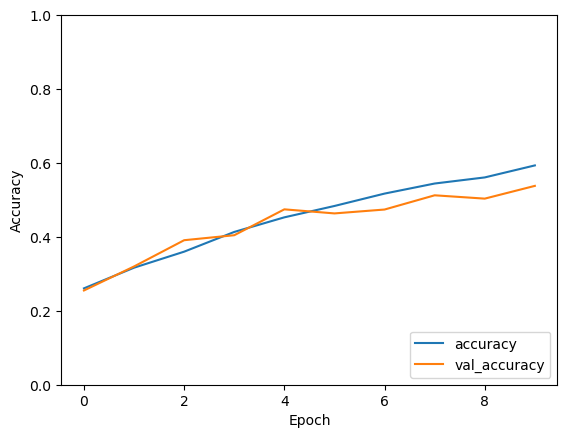

In [44]:
# Removed a block, and removed a dense
model, historytest = compile(model, 10)
evaluate(historytest)

Epoch 1/10
250/250 [==============================] - 30s 115ms/step - loss: 0.3528 - accuracy: 0.2634 - val_loss: 0.3239 - val_accuracy: 0.2580
Epoch 2/10
250/250 [==============================] - 29s 115ms/step - loss: 0.3111 - accuracy: 0.2960 - val_loss: 0.3039 - val_accuracy: 0.3090
Epoch 3/10
250/250 [==============================] - 29s 115ms/step - loss: 0.2965 - accuracy: 0.3150 - val_loss: 0.2982 - val_accuracy: 0.2895
Epoch 4/10
250/250 [==============================] - 29s 116ms/step - loss: 0.2748 - accuracy: 0.3620 - val_loss: 0.2680 - val_accuracy: 0.3745
Epoch 5/10
250/250 [==============================] - 29s 116ms/step - loss: 0.2634 - accuracy: 0.3855 - val_loss: 0.2633 - val_accuracy: 0.3800
Epoch 6/10
250/250 [==============================] - 29s 116ms/step - loss: 0.2497 - accuracy: 0.4067 - val_loss: 0.2491 - val_accuracy: 0.4140
Epoch 7/10
250/250 [==============================] - 29s 115ms/step - loss: 0.2362 - accuracy: 0.4375 - val_loss: 0.2337 - val_ac

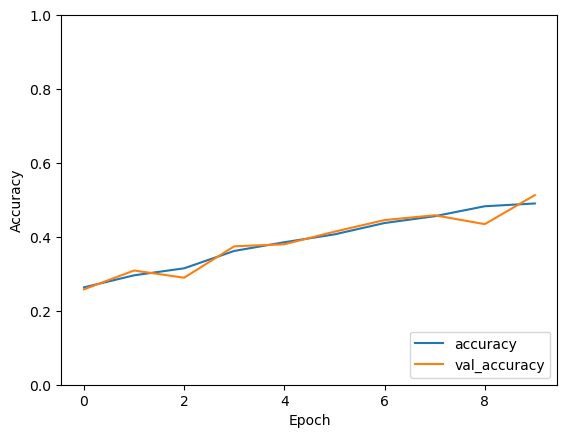

In [51]:
# Same model, removed tractors and other
model, historytest = compile(model, 10)
evaluate(historytest)

Epoch 1/10
250/250 [==============================] - 29s 113ms/step - loss: 0.3639 - accuracy: 0.2467 - val_loss: 0.3339 - val_accuracy: 0.2315
Epoch 2/10
250/250 [==============================] - 28s 112ms/step - loss: 0.3208 - accuracy: 0.2790 - val_loss: 0.3277 - val_accuracy: 0.2780
Epoch 3/10
250/250 [==============================] - 28s 112ms/step - loss: 0.3017 - accuracy: 0.3144 - val_loss: 0.2862 - val_accuracy: 0.3280
Epoch 4/10
250/250 [==============================] - 28s 111ms/step - loss: 0.2776 - accuracy: 0.3589 - val_loss: 0.2721 - val_accuracy: 0.3625
Epoch 5/10
250/250 [==============================] - 28s 111ms/step - loss: 0.2657 - accuracy: 0.3809 - val_loss: 0.2643 - val_accuracy: 0.3880
Epoch 6/10
250/250 [==============================] - 28s 111ms/step - loss: 0.2468 - accuracy: 0.4059 - val_loss: 0.2547 - val_accuracy: 0.4075
Epoch 7/10
250/250 [==============================] - 28s 112ms/step - loss: 0.2374 - accuracy: 0.4256 - val_loss: 0.2416 - val_ac

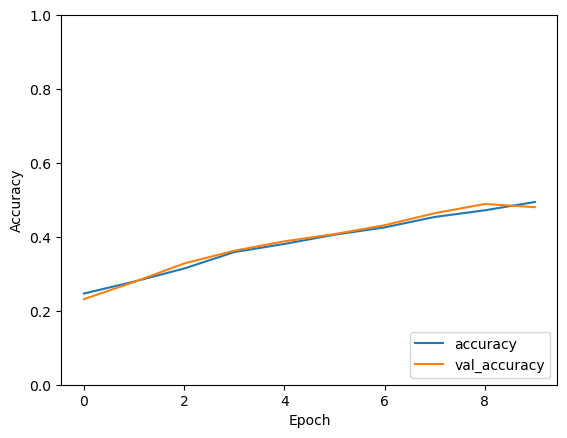

In [53]:
# Added one block and used 512 filter
model, historytest = compile(model, 10)
evaluate(historytest)

Epoch 1/10
250/250 [==============================] - 21s 78ms/step - loss: 0.3675 - accuracy: 0.2471 - val_loss: 0.3383 - val_accuracy: 0.2315
Epoch 2/10
250/250 [==============================] - 19s 76ms/step - loss: 0.3287 - accuracy: 0.2558 - val_loss: 0.3196 - val_accuracy: 0.2550
Epoch 3/10
250/250 [==============================] - 19s 76ms/step - loss: 0.2988 - accuracy: 0.3133 - val_loss: 0.2985 - val_accuracy: 0.2880
Epoch 4/10
250/250 [==============================] - 19s 76ms/step - loss: 0.2818 - accuracy: 0.3504 - val_loss: 0.2802 - val_accuracy: 0.3410
Epoch 5/10
250/250 [==============================] - 19s 76ms/step - loss: 0.2690 - accuracy: 0.3609 - val_loss: 0.2695 - val_accuracy: 0.3690
Epoch 6/10
250/250 [==============================] - 19s 76ms/step - loss: 0.2556 - accuracy: 0.3836 - val_loss: 0.2587 - val_accuracy: 0.4030
Epoch 7/10
250/250 [==============================] - 19s 76ms/step - loss: 0.2427 - accuracy: 0.4101 - val_loss: 0.2464 - val_accuracy:

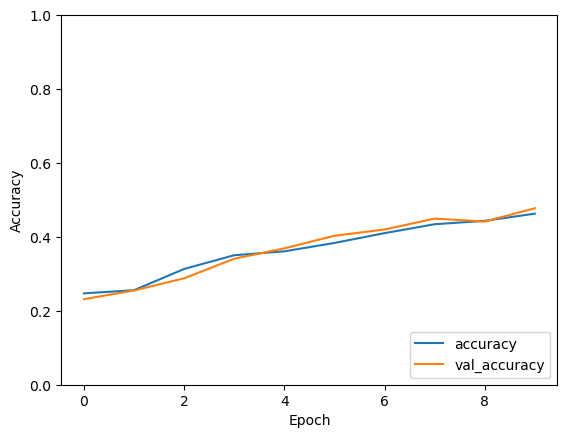

In [55]:
# Added dense, and lowered some conv2d filter
model, historytest = compile(model, 10)
evaluate(historytest)

Epoch 1/20
250/250 [==============================] - 26s 77ms/step - loss: 0.3519 - accuracy: 0.2461 - val_loss: 0.3248 - val_accuracy: 0.2385
Epoch 2/20
250/250 [==============================] - 18s 74ms/step - loss: 0.3127 - accuracy: 0.2903 - val_loss: 0.2953 - val_accuracy: 0.3455
Epoch 3/20
250/250 [==============================] - 18s 74ms/step - loss: 0.2895 - accuracy: 0.3350 - val_loss: 0.2811 - val_accuracy: 0.3360
Epoch 4/20
250/250 [==============================] - 18s 74ms/step - loss: 0.2730 - accuracy: 0.3769 - val_loss: 0.2750 - val_accuracy: 0.3740
Epoch 5/20
250/250 [==============================] - 19s 74ms/step - loss: 0.2590 - accuracy: 0.3919 - val_loss: 0.2583 - val_accuracy: 0.4070
Epoch 6/20
250/250 [==============================] - 19s 75ms/step - loss: 0.2453 - accuracy: 0.4205 - val_loss: 0.2567 - val_accuracy: 0.4135
Epoch 7/20
250/250 [==============================] - 19s 75ms/step - loss: 0.2328 - accuracy: 0.4439 - val_loss: 0.2471 - val_accuracy:

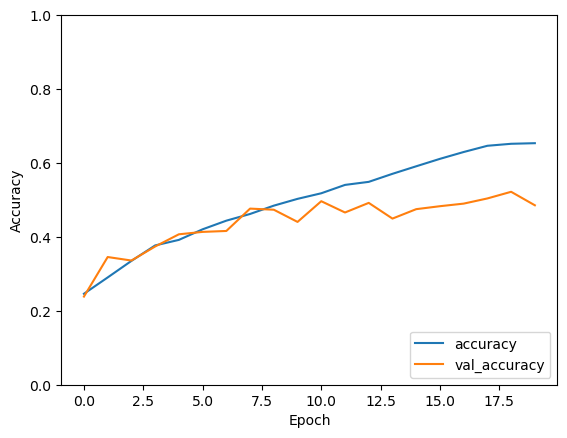

In [10]:
# Increased epoch from before
model, historytest = compile(model, 20)
evaluate(historytest)

Epoch 1/20
250/250 [==============================] - 23s 88ms/step - loss: 0.3709 - accuracy: 0.2384 - val_loss: 0.3413 - val_accuracy: 0.2530
Epoch 2/20
250/250 [==============================] - 22s 87ms/step - loss: 0.3264 - accuracy: 0.2841 - val_loss: 0.3165 - val_accuracy: 0.2685
Epoch 3/20
250/250 [==============================] - 22s 86ms/step - loss: 0.3087 - accuracy: 0.3061 - val_loss: 0.3060 - val_accuracy: 0.3065
Epoch 4/20
250/250 [==============================] - 22s 86ms/step - loss: 0.2892 - accuracy: 0.3484 - val_loss: 0.2699 - val_accuracy: 0.3600
Epoch 5/20
250/250 [==============================] - 22s 86ms/step - loss: 0.2738 - accuracy: 0.3730 - val_loss: 0.2729 - val_accuracy: 0.3595
Epoch 6/20
250/250 [==============================] - 22s 86ms/step - loss: 0.2586 - accuracy: 0.4031 - val_loss: 0.2489 - val_accuracy: 0.3970
Epoch 7/20
250/250 [==============================] - 22s 86ms/step - loss: 0.2409 - accuracy: 0.4252 - val_loss: 0.2266 - val_accuracy:

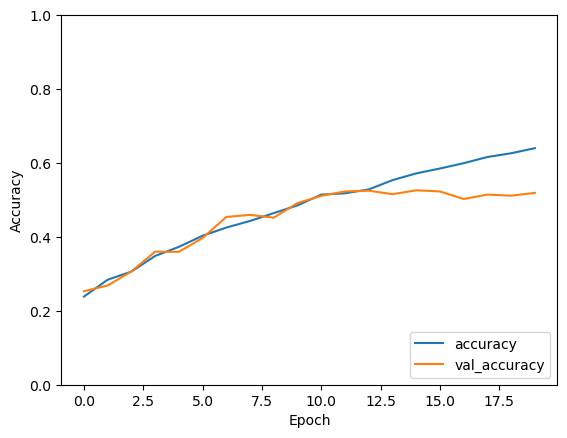

In [12]:
# removed a block but still uses 512 filter. introducted 0.1 dropout on each dense
# 20 epoch
model, historytest = compile(model, 20)
evaluate(historytest)

Epoch 1/20
250/250 [==============================] - 22s 83ms/step - loss: 0.3803 - accuracy: 0.2334 - val_loss: 0.3267 - val_accuracy: 0.2720
Epoch 2/20
250/250 [==============================] - 21s 82ms/step - loss: 0.3357 - accuracy: 0.2669 - val_loss: 0.3217 - val_accuracy: 0.2725
Epoch 3/20
250/250 [==============================] - 21s 83ms/step - loss: 0.3253 - accuracy: 0.2820 - val_loss: 0.3064 - val_accuracy: 0.2845
Epoch 4/20
250/250 [==============================] - 21s 83ms/step - loss: 0.3147 - accuracy: 0.3018 - val_loss: 0.2987 - val_accuracy: 0.3165
Epoch 5/20
250/250 [==============================] - 21s 83ms/step - loss: 0.3057 - accuracy: 0.3139 - val_loss: 0.2895 - val_accuracy: 0.3040
Epoch 6/20
250/250 [==============================] - 21s 83ms/step - loss: 0.2933 - accuracy: 0.3327 - val_loss: 0.2809 - val_accuracy: 0.3490
Epoch 7/20
250/250 [==============================] - 21s 83ms/step - loss: 0.2803 - accuracy: 0.3602 - val_loss: 0.2661 - val_accuracy:

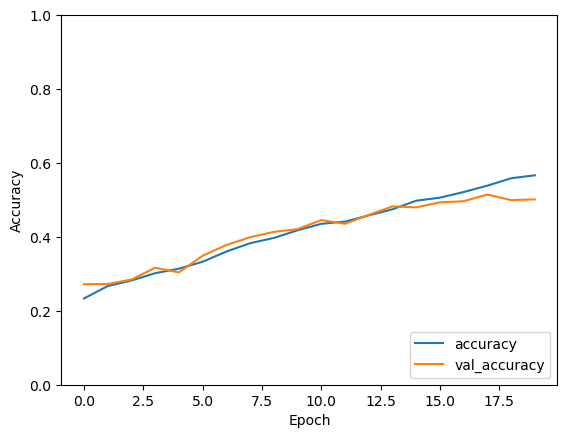

In [16]:
# Increased the dropout to 0.25 each
model, historytest = compile(model, 20)
evaluate(historytest)

Epoch 1/50
500/500 [==============================] - 24s 47ms/step - loss: 0.3720 - accuracy: 0.2279 - val_loss: 0.3144 - val_accuracy: 0.2780
Epoch 2/50
500/500 [==============================] - 23s 47ms/step - loss: 0.3323 - accuracy: 0.2837 - val_loss: 0.2949 - val_accuracy: 0.3240
Epoch 3/50
500/500 [==============================] - 23s 47ms/step - loss: 0.3093 - accuracy: 0.3243 - val_loss: 0.2782 - val_accuracy: 0.4050
Epoch 4/50
500/500 [==============================] - 23s 47ms/step - loss: 0.2955 - accuracy: 0.3510 - val_loss: 0.2671 - val_accuracy: 0.4125
Epoch 5/50
500/500 [==============================] - 23s 47ms/step - loss: 0.2800 - accuracy: 0.3755 - val_loss: 0.2575 - val_accuracy: 0.4340
Epoch 6/50
500/500 [==============================] - 23s 47ms/step - loss: 0.2671 - accuracy: 0.4059 - val_loss: 0.2436 - val_accuracy: 0.4315
Epoch 7/50
500/500 [==============================] - 23s 47ms/step - loss: 0.2572 - accuracy: 0.4181 - val_loss: 0.2399 - val_accuracy:

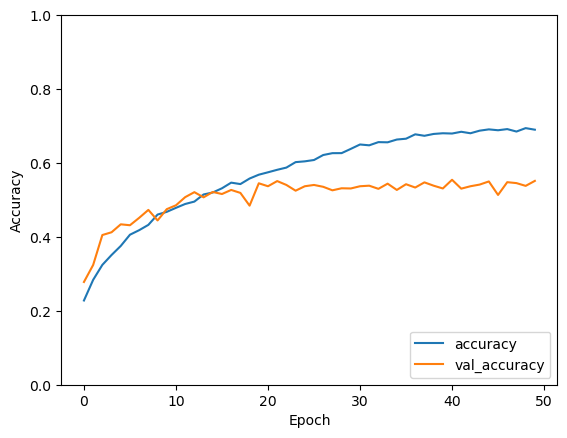

In [24]:
# Changed learning rate and batch size to manual
model, historytest = compile(model, 50, 0.0001, 16)
evaluate(historytest)

Epoch 1/25
500/500 [==============================] - 40s 72ms/step - loss: 0.3375 - accuracy: 0.2701 - val_loss: 0.3100 - val_accuracy: 0.2820
Epoch 2/25
500/500 [==============================] - 36s 72ms/step - loss: 0.3028 - accuracy: 0.3260 - val_loss: 0.2920 - val_accuracy: 0.3545
Epoch 3/25
500/500 [==============================] - 36s 72ms/step - loss: 0.2801 - accuracy: 0.3713 - val_loss: 0.2660 - val_accuracy: 0.3850
Epoch 4/25
500/500 [==============================] - 36s 73ms/step - loss: 0.2624 - accuracy: 0.3957 - val_loss: 0.2534 - val_accuracy: 0.4350
Epoch 5/25
500/500 [==============================] - 36s 73ms/step - loss: 0.2472 - accuracy: 0.4215 - val_loss: 0.2380 - val_accuracy: 0.4450
Epoch 6/25
500/500 [==============================] - 36s 73ms/step - loss: 0.2333 - accuracy: 0.4476 - val_loss: 0.2267 - val_accuracy: 0.4720
Epoch 7/25
500/500 [==============================] - 36s 73ms/step - loss: 0.2192 - accuracy: 0.4780 - val_loss: 0.2305 - val_accuracy:

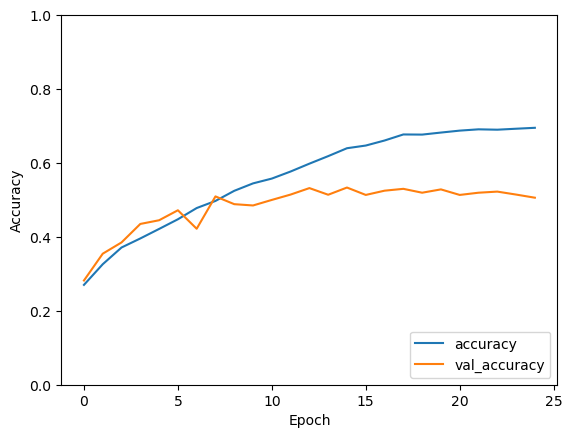

In [27]:
# adjusted learning rate and batch size
model, historytest = compile(model, 25, 0.0001, 16)
evaluate(historytest)

Epoch 1/25
500/500 [==============================] - 23s 45ms/step - loss: 0.3571 - accuracy: 0.2477 - val_loss: 0.3208 - val_accuracy: 0.2820
Epoch 2/25
500/500 [==============================] - 22s 44ms/step - loss: 0.3184 - accuracy: 0.3083 - val_loss: 0.2857 - val_accuracy: 0.3325
Epoch 3/25
500/500 [==============================] - 22s 45ms/step - loss: 0.2946 - accuracy: 0.3442 - val_loss: 0.2693 - val_accuracy: 0.3900
Epoch 4/25
500/500 [==============================] - 22s 45ms/step - loss: 0.2775 - accuracy: 0.3735 - val_loss: 0.2629 - val_accuracy: 0.3595
Epoch 5/25
500/500 [==============================] - 22s 45ms/step - loss: 0.2630 - accuracy: 0.4017 - val_loss: 0.2494 - val_accuracy: 0.4240
Epoch 6/25
500/500 [==============================] - 23s 45ms/step - loss: 0.2459 - accuracy: 0.4320 - val_loss: 0.2497 - val_accuracy: 0.4170
Epoch 7/25
500/500 [==============================] - 23s 45ms/step - loss: 0.2357 - accuracy: 0.4460 - val_loss: 0.2323 - val_accuracy:

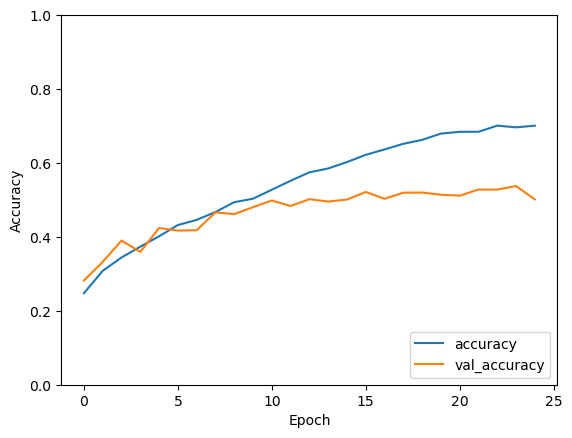

In [29]:
model, historytest = compile(model, 25, 0.0001, 16)
evaluate(historytest)

In [39]:
model, historytest = compile(model, 30, 0.0001, 16)
evaluate(historytest)

Epoch 1/30
438/438 [==============================] - 20s 42ms/step - loss: 0.3372 - accuracy: 0.2721 - val_loss: 0.3090 - val_accuracy: 0.2810
Epoch 2/30
438/438 [==============================] - 18s 40ms/step - loss: 0.3033 - accuracy: 0.3256 - val_loss: 0.3003 - val_accuracy: 0.3103
Epoch 3/30
438/438 [==============================] - 18s 40ms/step - loss: 0.2842 - accuracy: 0.3551 - val_loss: 0.2728 - val_accuracy: 0.3907
Epoch 4/30
307/438 [====================>.........] - ETA: 4s - loss: 0.2734 - accuracy: 0.3836

KeyboardInterrupt: 

In [14]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.1),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    # layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.1),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.1),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(512, (3, 3), activation='relu'),
    # layers.Conv2D(256, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    layers.GlobalAveragePooling2D(),
    # tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(9, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 47, 47, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 45, 45, 128)       73856     
                                                        

Epoch 1/25
438/438 [==============================] - 20s 43ms/step - loss: 0.4888 - accuracy: 0.2666 - val_loss: 0.4222 - val_accuracy: 0.3100
Epoch 2/25
438/438 [==============================] - 18s 42ms/step - loss: 0.3913 - accuracy: 0.3233 - val_loss: 0.3559 - val_accuracy: 0.3773
Epoch 3/25
438/438 [==============================] - 19s 42ms/step - loss: 0.3437 - accuracy: 0.3554 - val_loss: 0.3439 - val_accuracy: 0.3757
Epoch 4/25
438/438 [==============================] - 19s 42ms/step - loss: 0.3182 - accuracy: 0.3769 - val_loss: 0.3076 - val_accuracy: 0.3907
Epoch 5/25
438/438 [==============================] - 19s 42ms/step - loss: 0.2967 - accuracy: 0.4077 - val_loss: 0.3049 - val_accuracy: 0.3883
Epoch 6/25
438/438 [==============================] - 19s 42ms/step - loss: 0.2810 - accuracy: 0.4240 - val_loss: 0.2737 - val_accuracy: 0.4313
Epoch 7/25
438/438 [==============================] - 19s 43ms/step - loss: 0.2633 - accuracy: 0.4426 - val_loss: 0.2633 - val_accuracy:

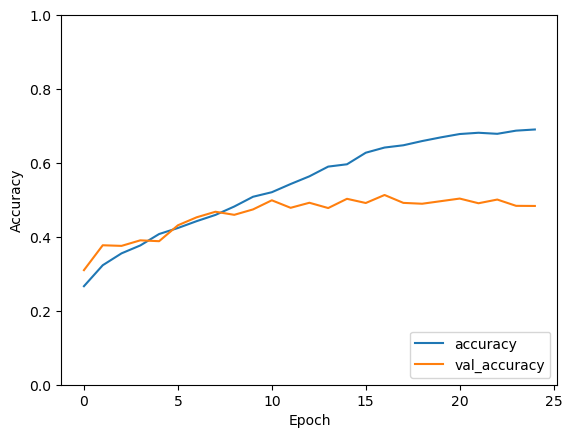

In [13]:
model, historytest = compile(model, 25, 0.0001, 16)
evaluate(historytest)

In [15]:
model, historytest = compile(model, 25, 0.0001, 32)
evaluate(historytest)

Epoch 1/25
219/219 [==============================] - 23s 87ms/step - loss: 0.5157 - accuracy: 0.2587 - val_loss: 0.4681 - val_accuracy: 0.2740
Epoch 2/25
219/219 [==============================] - 17s 76ms/step - loss: 0.4366 - accuracy: 0.2957 - val_loss: 0.4126 - val_accuracy: 0.3257
Epoch 3/25
219/219 [==============================] - 17s 76ms/step - loss: 0.3860 - accuracy: 0.3283 - val_loss: 0.3619 - val_accuracy: 0.3613
Epoch 4/25
219/219 [==============================] - 17s 76ms/step - loss: 0.3523 - accuracy: 0.3603 - val_loss: 0.3418 - val_accuracy: 0.3650
Epoch 5/25
219/219 [==============================] - 17s 76ms/step - loss: 0.3283 - accuracy: 0.3843 - val_loss: 0.3266 - val_accuracy: 0.3917
Epoch 6/25
219/219 [==============================] - 17s 76ms/step - loss: 0.3115 - accuracy: 0.4006 - val_loss: 0.3035 - val_accuracy: 0.4173
Epoch 7/25
219/219 [==============================] - 17s 76ms/step - loss: 0.2942 - accuracy: 0.4141 - val_loss: 0.2915 - val_accuracy:

KeyboardInterrupt: 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 128)      0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 45, 45, 256)       295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 43, 43, 512)       1180160   
                                                        

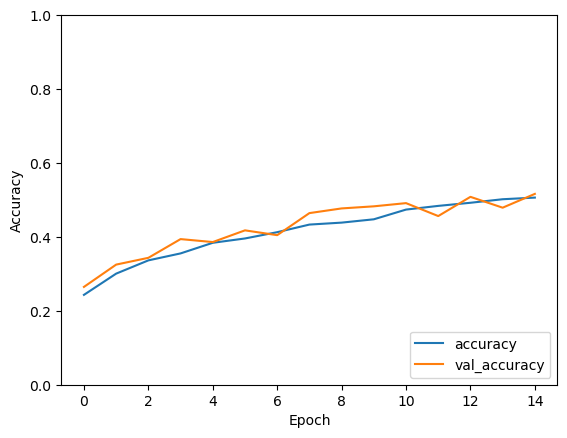

In [16]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Dropout(rate=0.1),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(9, activation='sigmoid')
])
model.summary()
model, historytest = compile(model, 15, 0.001, 32)
evaluate(historytest)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 128)      0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 45, 45, 256)       295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 43, 43, 512)       1180160   
                                                        

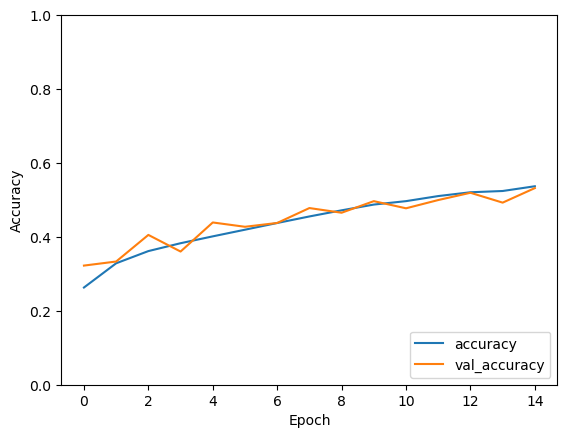

In [17]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Dropout(rate=0.1),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(9, activation='sigmoid')
])
model.summary()
model, historytest = compile(model, 30, 0.0001, 32)
evaluate(historytest)

In [31]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Dropout(rate=0.1),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(9, activation='sigmoid')
])
model.summary()
model, historytest = compile(model, 30, 0.0001, 32)
evaluate(historytest)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 128)      0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 45, 45, 256)       295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 43, 43, 512)       1180160   
                                                        

KeyboardInterrupt: 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 256)       819456    
                                                                 
 conv2d_3 (Conv2D)           (None, 40, 40, 256)       1638656   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                    

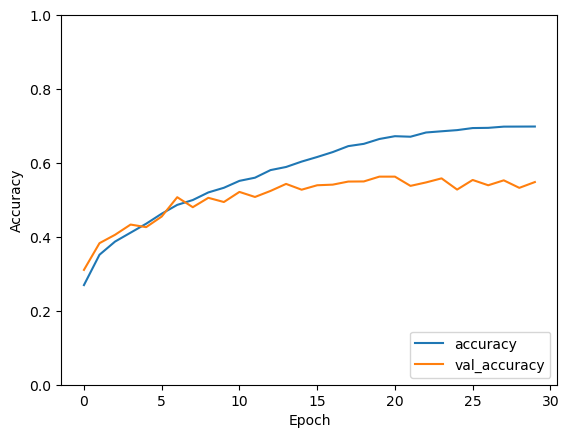

In [9]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Dropout(rate=0.1),
    layers.Conv2D(256, (5, 5), activation='relu'),
    layers.Conv2D(256, (5, 5), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    # tf.keras.layers.Dropout(rate=0.1),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(9, activation='sigmoid')
])
model.summary()
model, historytest = compile(model, 30, 0.0001, 32)
evaluate(historytest)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 256)       819456    
                                                                 
 conv2d_3 (Conv2D)           (None, 40, 40, 256)       1638656   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                    

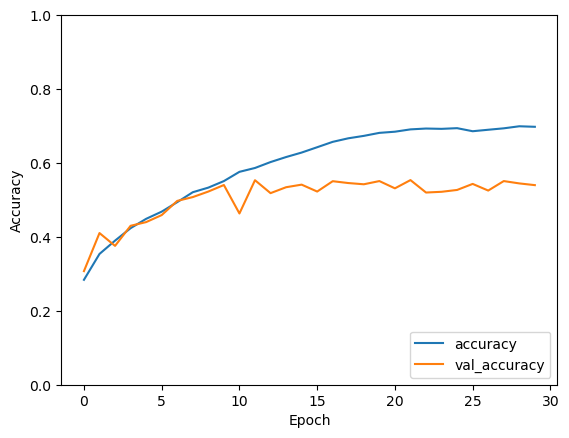

In [10]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Dropout(rate=0.1),
    layers.Conv2D(256, (5, 5), activation='relu'),
    layers.Conv2D(256, (5, 5), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    # tf.keras.layers.Dropout(rate=0.1),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(9, activation='sigmoid')
])
model.summary()
model, historytest = compile(model, 30, 0.0001, 16)
evaluate(historytest)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 128)      0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 45, 45, 256)       295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 43, 43, 512)       1180160   
                                                        

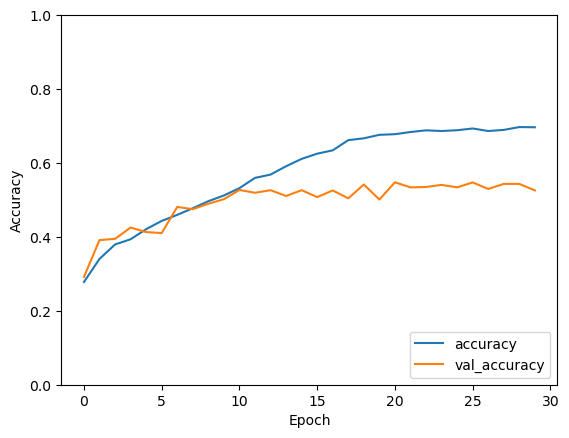

In [11]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Dropout(rate=0.1),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(9, activation='sigmoid')
])
model.summary()
model, historytest = compile(model, 30, 0.0001, 32)
evaluate(historytest)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 47, 47, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 45, 45, 256)       295168    
                                                        

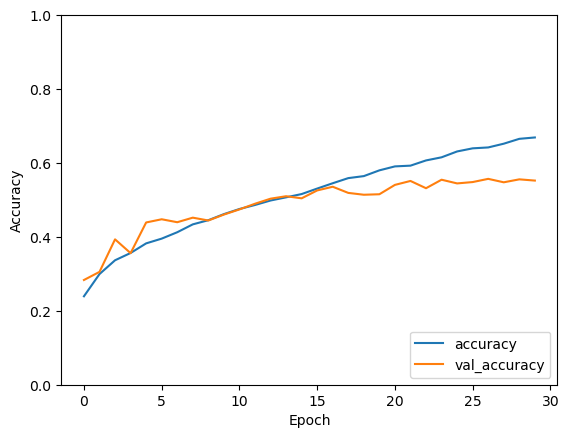

In [13]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.2),
    # tf.keras.layers.Dropout(rate=0.1),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.2),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.2),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(9, activation='sigmoid')
])
model.summary()
model, historytest = compile(model, 30, 0.0001, 32)
evaluate(historytest)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 128)      0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 45, 45, 256)       295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 43, 43, 512)       1180160   
                                                        

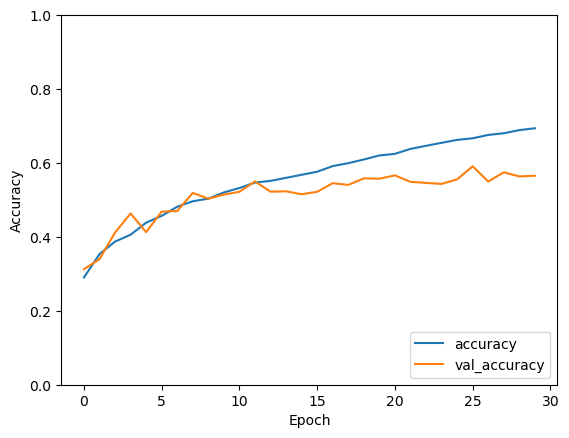

In [14]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Dropout(rate=0.1),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(9, activation='sigmoid')
])
model.summary()
model, historytest = compile(model, 30, 0.0001, 16)
evaluate(historytest)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 45, 45, 128)       73856     
                                                                 
 conv2d_4 (Conv2D)           (None, 43, 43, 256)       295168    
                                                        

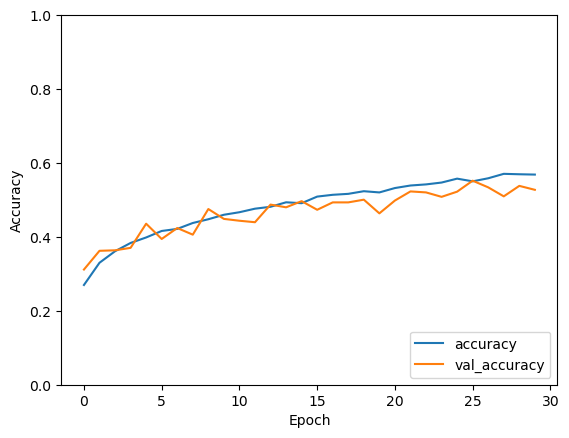

In [15]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Dropout(rate=0.1),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(9, activation='sigmoid')
])
model.summary()
model, historytest = compile(model, 30, 0.0001, 32)
evaluate(historytest)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 47, 47, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 45, 45, 256)       295168    
                                                        

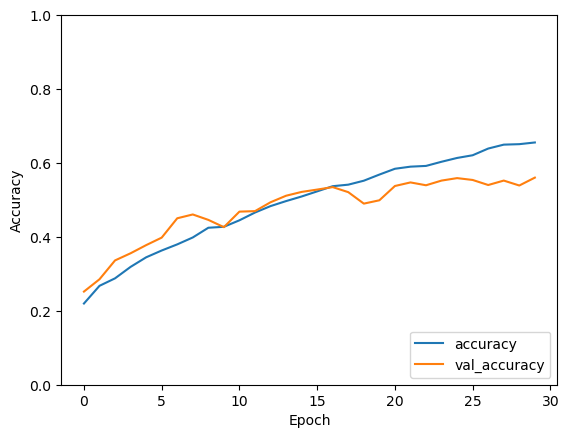

In [16]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.15),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.15),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.15),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(9, activation='sigmoid')
])
model.summary()
model, historytest = compile(model, 30, 0.0001, 32)
evaluate(historytest)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 47, 47, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 45, 45, 256)       295168    
                                                        

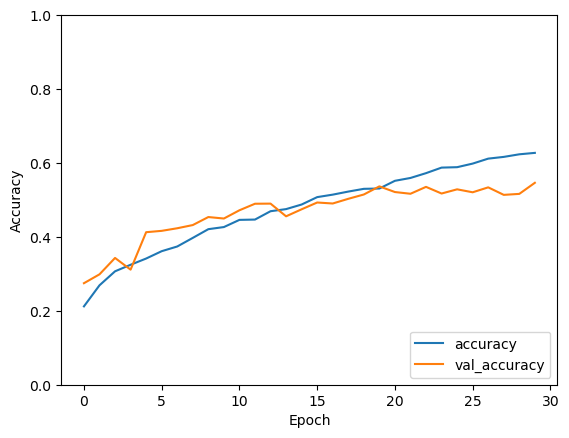

In [17]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.15),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.15),
    layers.Conv2D(400, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.15),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(9, activation='sigmoid')
])
model.summary()
model, historytest = compile(model, 30, 0.0001, 32)
evaluate(historytest)

In [37]:
model.save("../data/solver/multilabel_model.h5")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 45, 45, 128)       73856     
                                                                 
 conv2d_4 (Conv2D)           (None, 43, 43, 256)       295168    
                                                        

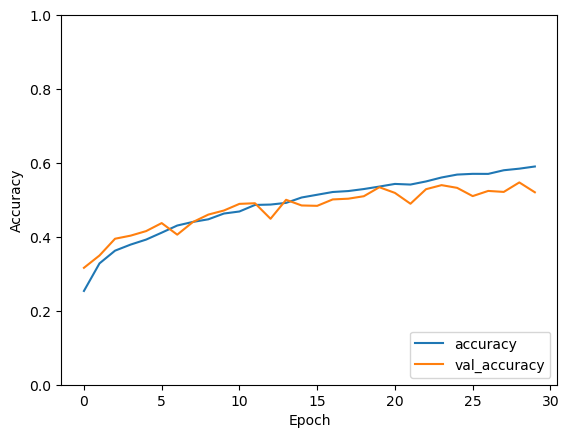

In [18]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Dropout(rate=0.1),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0004)),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(9, activation='sigmoid')
])
model.summary()
model, historytest = compile(model, 30, 0.0001, 32)
evaluate(historytest)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 98, 98, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 98, 98, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 96, 96, 128)      512       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 96, 96, 128)       0

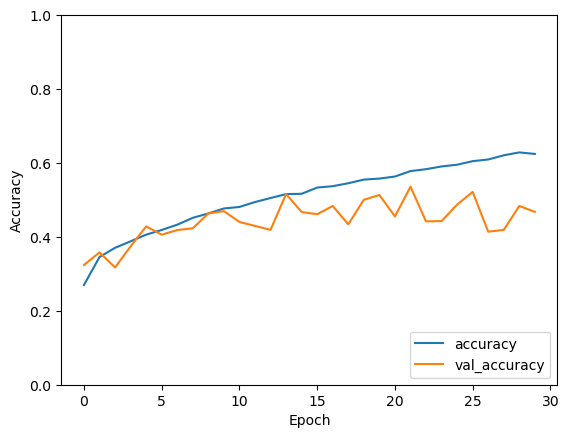

In [19]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    layers.Conv2D(64, (3, 3), input_shape=(100, 100, 3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(128, (3, 3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(128, (3, 3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.15),
    layers.Conv2D(256, (3, 3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(512, (3, 3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.15),
    layers.Conv2D(512, (3, 3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(rate=0.15),
    layers.Conv2D(512, (3, 3)),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(9, activation='sigmoid')
])
model.summary()
model, historytest = compile(model, 30, 0.0001, 32)
evaluate(historytest)

In [35]:
predictions = model.predict(xtest)

94/94 [==============================] - 7s 72ms/step


In [29]:
LABEL_NAMES = [
        'Bicycle', 'Bridge', 'Bus', 'Car', 'Crosswalk', 
        'Hydrant', 'Motorcycle', 'Stairs',
        'Traffic Light']

In [ ]:
index = 0
for i in predictions:
    img = xtest[index]
    plt.imshow(img)
    plt.show()
    print([LABEL_NAMES[j] for j in range(9)])
    print(["%.2f" % j for j in i])
    if index > 100:
        break
    index += 1